In [1]:
import numpy as np
import matplotlib.pyplot as pl

from expose.instruments import (MAVIS, MUSE)
from expose.telescopes import VLT
from expose.sources import fsps_source
from expose.sky import sky_source

## First initilize the source and sky model

In [2]:
skyModel = sky_source()
sourceModel = fsps_source()

## Set source and sky parameters.  

In this case we're assuming a relatively dark sky with FLI=0.3 and a bright-ish source at z=0.01.

In [3]:
skyModel.set_params(fli=0.3, airmass=1.2, pwv=10)
sourceModel.set_params(age=8, obs_mag=18, obs_band='sdss_r', redshift=0.01)

## initialize the telescope and instruments.  
In principle there is nothing stopping mixing and matching instruments on different
telescopes, modulo changes to the FoV etc.

In [4]:
tel = VLT()
muse = MUSE()
mavis = MAVIS(R=7000)

## Run the observations and plot the output.  Returns predicted S/N per pixel.

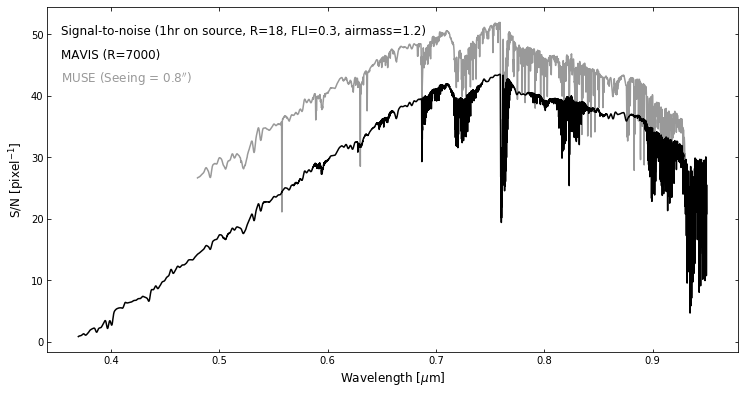

In [5]:
wave_muse, sn_muse = muse.observe(sourceModel, tel, sky=skyModel, seeing=0.8, dit=3600, ndit=1)
wave_mavis, sn_mavis = mavis.observe(sourceModel, tel, sky=skyModel, dit=3600, ndit=1)


fig = pl.figure(figsize=(12,6))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(wave_muse, sn_muse, '-', color='0.6')
ax.plot(wave_mavis, sn_mavis, '-', color='black')

ax.text(0.02,0.92, 'Signal-to-noise (1hr on source, R=18, FLI=0.3, airmass=1.2)', 
        transform=ax.transAxes, size=12)
ax.text(0.02,0.85, 'MAVIS (R=7000)', transform=ax.transAxes, size=12)
ax.text(0.02,0.78, 'MUSE (Seeing = 0.8$^{\prime\prime}$)', transform=ax.transAxes, color='0.6', size=12)

ax.set_ylabel('S/N [pixel$^{-1}$]', size=12)
ax.set_xlabel('Wavelength [$\mu$m]', size=12)
pl.show()